#  Linear regression

In this part, you will implement linear regression with multiple variables to
predict the prices of houses. Suppose you are selling your house and you
want to know what a good market price would be. One way to do this is to
first collect information on recent houses sold and make a model of housing
prices

The fille ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the
second column is the number of bedrooms, and the third column is the price
of the house.

In [61]:
#from google.colab import files
#uploaded = files.upload()
#ls

In [62]:
with open('ex1data2.txt', 'r') as archivo:
    contenido = archivo.read()

#print(contenido)

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = np.loadtxt('ex1data2.txt', delimiter=',')  # Load the text file with a comma as a delimiter
print(data[0:5,:])
#load the data a create a np vectors X and y

X = data[:, 0:2]  # las dos primeras columnas
y = data[:, 2:]   # la tercera columna

print('First 10 examples from the dataset:')
for i in range(10):
     print(f'x = [{X[i, 0]:.0f} {X[i, 1]:.0f}], y = {y[i,0].item():.0f}')


[[2.104e+03 3.000e+00 3.999e+05]
 [1.600e+03 3.000e+00 3.299e+05]
 [2.400e+03 3.000e+00 3.690e+05]
 [1.416e+03 2.000e+00 2.320e+05]
 [3.000e+03 4.000e+00 5.399e+05]]
First 10 examples from the dataset:
x = [2104 3], y = 399900
x = [1600 3], y = 329900
x = [2400 3], y = 369000
x = [1416 2], y = 232000
x = [3000 4], y = 539900
x = [1985 4], y = 299900
x = [1534 3], y = 314900
x = [1427 3], y = 198999
x = [1380 3], y = 212000
x = [1494 3], y = 242500


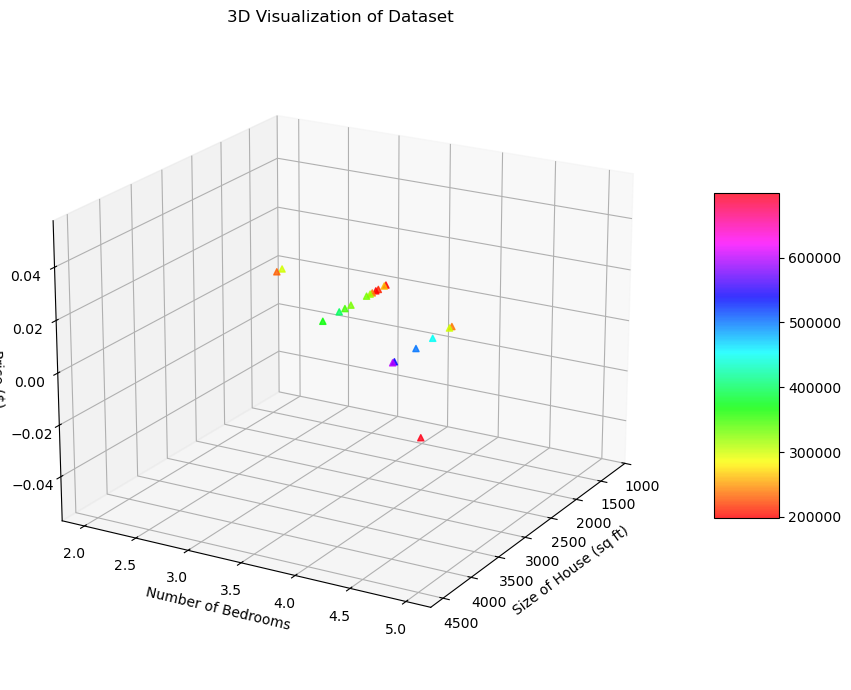

In [64]:
# ==================== Part 1: Plotting ====================
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the points with red x markers
my_cmap = plt.get_cmap('hsv')
sctt = ax.scatter3D(X[0:20, 0], X[0:20, 1],
                    alpha = 0.8,
                    c = y[0:20,0],
                    cmap = my_cmap,
                    marker ='^')
# Label axes
ax.set_xlabel('Size of House (sq ft)')
ax.set_ylabel('Number of Bedrooms')
ax.set_zlabel('Price ($)')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
# Set grid and view angle similar to MATLAB
ax.view_init(elev=20, azim=30)
ax.grid(True)

plt.title('3D Visualization of Dataset')
plt.tight_layout()
plt.show()

# Feature normalization

Your task here is to complete the code in featureNormalize.m to

*   Subtract the mean value of each feature from the dataset.
*   After subtracting the mean, additionally scale (divide) the feature values
by their respective standard deviations

The mean and std should be:

mu= [2000.68085106    3.17021277], std = [7.94702354e+02 7.60981887e-01]

In [65]:

def featureNormalize(X):
    #Normaliza las características en X restando la media y dividiendo por la desviación estándar.
    # Crear una copia para no modificar el original
    X_norm = X.copy()
    mu = np.mean(X, axis=0)             # Calcular la media de cada característica
    sigma = np.std(X, axis=0, ddof=1)   # Calcular la desviación estándar de cada característica
    X_norm = (X - mu) / sigma           # Normalizar restando la media y dividiendo por la desviación estándar
    return X_norm, mu, sigma

# Extraer las características
X = data[:, 0:2]
# Normalizar las características
X_norm, mu, sigma = featureNormalize(X)
print(f'mu= {mu}, std = {sigma}')
print('First 10 examples from the dataset:')
for i in range(10):
    print(f'x = [{X_norm[i, 0]:.4f} {X_norm[i, 1]:.4f}]')
print(X_norm.shape)

mu= [2000.68085106    3.17021277], std = [7.94702354e+02 7.60981887e-01]
First 10 examples from the dataset:
x = [0.1300 -0.2237]
x = [-0.5042 -0.2237]
x = [0.5025 -0.2237]
x = [-0.7357 -1.5378]
x = [1.2575 1.0904]
x = [-0.0197 1.0904]
x = [-0.5872 -0.2237]
x = [-0.7219 -0.2237]
x = [-0.7810 -0.2237]
x = [-0.6376 -0.2237]
(47, 2)


# Cost Function

The objective of linear regression is to minimize the cost function:
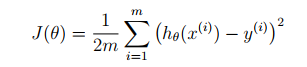

where the hypothesis h is given by

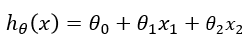




In [66]:
# using numpy and scipy
# Sigmoid function
from scipy.optimize import minimize

#Implement cost function
def cost_function(theta, X, y):
    m = len(y)
  
    predictions = X @ theta              # h_theta(x)
    errors = predictions - y
    J = (1 / (2 * m)) * np.sum(errors ** 2)
    return J


m = data.shape[0]
X = data[:, 0:2]
[X,mu, sigma] = featureNormalize(X)
X = np.hstack([np.ones((m, 1)), X])
print(X[0:5,:])
theta = np.zeros((3, 1))
print(f"Model parameters: {theta}")
print(f"Cost function: {cost_function(theta, X, y)}")


[[ 1.          0.13000987 -0.22367519]
 [ 1.         -0.50418984 -0.22367519]
 [ 1.          0.50247636 -0.22367519]
 [ 1.         -0.73572306 -1.53776691]
 [ 1.          1.25747602  1.09041654]]
Model parameters: [[0.]
 [0.]
 [0.]]
Cost function: 65591548106.45744


# Gradient descent

Next, you will implement gradient descent in the file gradientDescent.m.
The loop structure has been written for you, and you only need to supply
the updates to θ within each iteration.

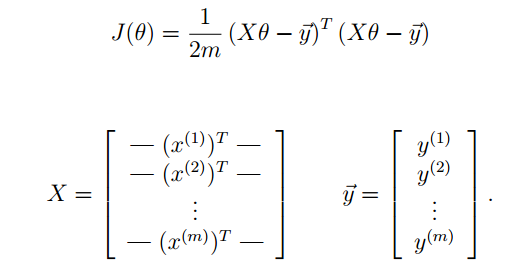

Using the following values:
iterations = 3
theta = np.zeros((2, 1))
alpha = 0.01

The first three iteration:

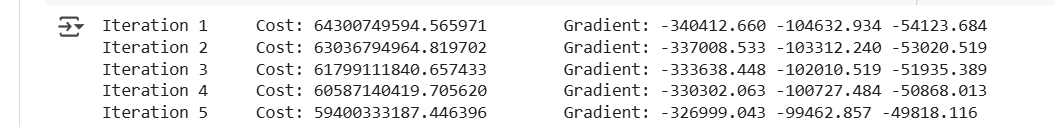

In [67]:
import numpy as np
import matplotlib.pyplot as plt

iterations = 300
theta = np.zeros((3, 1))
alpha = 0.01

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    J= np.zeros(iterations)

    for iter in range(iterations):
     #Instructions: Perform a single gradient step on the parameter vector
        #               theta.
        #
      # Hint: While debugging, it can be useful to print out the values
      #       of the cost function (computeCostMulti) and gradient here.
      # Save the cost J in every iteration

        predictions = X @ theta
        error = predictions - y
        gradient = (1 / m) * (X.T @ error)
        step = alpha * gradient
        theta = theta - step

        cost = cost_function(theta, X, y)
        J[iter] = cost

        # Imprimir la iteración, el costo y el gradiente negativo (valor restado a theta)
        gradient = gradient.flatten()  # negativo del gradiente
        gradient_str = '  '.join(f"{val:.6f}" for val in gradient)
        print(f"iteration {iter + 1}  cost function: {cost:.6f}  gradient {gradient_str}")

    return theta, J

# Ejecutar descenso por gradiente
theta, J = gradient_descent(X, y, theta, alpha, iterations)
print("Theta found by gradient descent: ", theta.ravel())

# Predict values for population sizes of 35,000 and 70,000
input_features = np.array([2000, 3])
normalized_features = (input_features - mu) / sigma
print(normalized_features)
# Add the bias term (1) as the first element
predict1 = np.hstack([1, normalized_features]) @ theta
print(f'For a house with {input_features[0]} sqft and {input_features[1]} bedrooms, we predict a profit of ${(predict1 * 10000).item():.2f}')




iteration 1  cost function: 64300749594.565971  gradient -340412.659574  -104632.933766  -54123.683844
iteration 2  cost function: 63036794964.819687  gradient -337008.532979  -103312.240277  -53020.518742
iteration 3  cost function: 61799111840.657433  gradient -333638.447649  -102010.518654  -51935.388675
iteration 4  cost function: 60587140419.705620  gradient -330302.063172  -100727.484373  -50868.013154
iteration 5  cost function: 59400333187.446388  gradient -326999.042541  -99462.857233  -49818.115996
iteration 6  cost function: 58238154637.679718  gradient -323729.052115  -98216.361287  -48785.425253
iteration 7  cost function: 57100080999.611237  gradient -320491.761594  -96987.724781  -47769.673156
iteration 8  cost function: 55985599971.401466  gradient -317286.843978  -95776.680089  -46770.596041
iteration 9  cost function: 54894210460.017029  gradient -314113.975538  -94582.963646  -45787.934294
iteration 10  cost function: 53825422327.227722  gradient -310972.835783  -934

# Visualization

#Selecting learning rates

In this part of the exercise, you will get to try out different learning rates for
the dataset and find a learning rate that converges quickly. You can change
the learning rate and call the function "gradientDescent".

You need to modify "gradientDescent" function and it should also return the history of J(θ) values in a vector J. After the last iteration, the ex1 multi.m script plots the J values against
the number of the iterations.

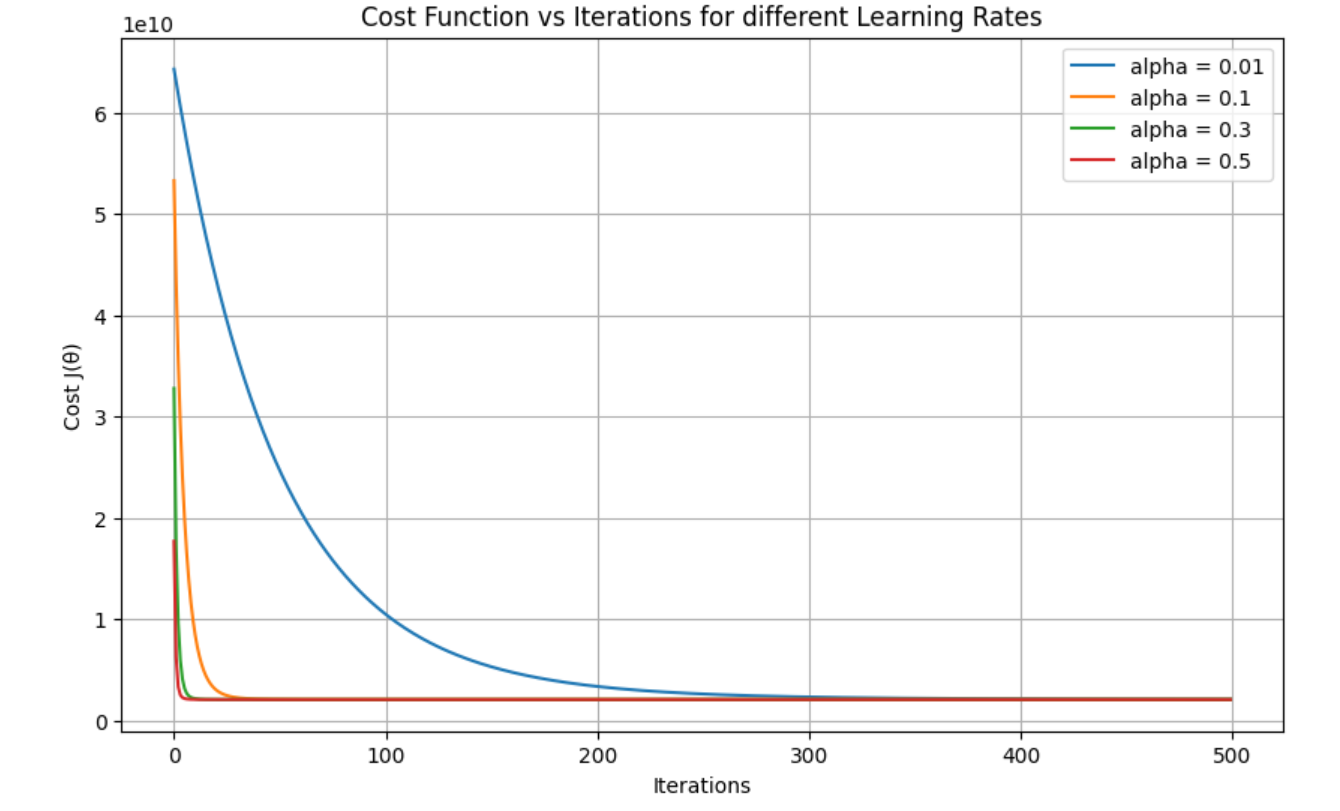

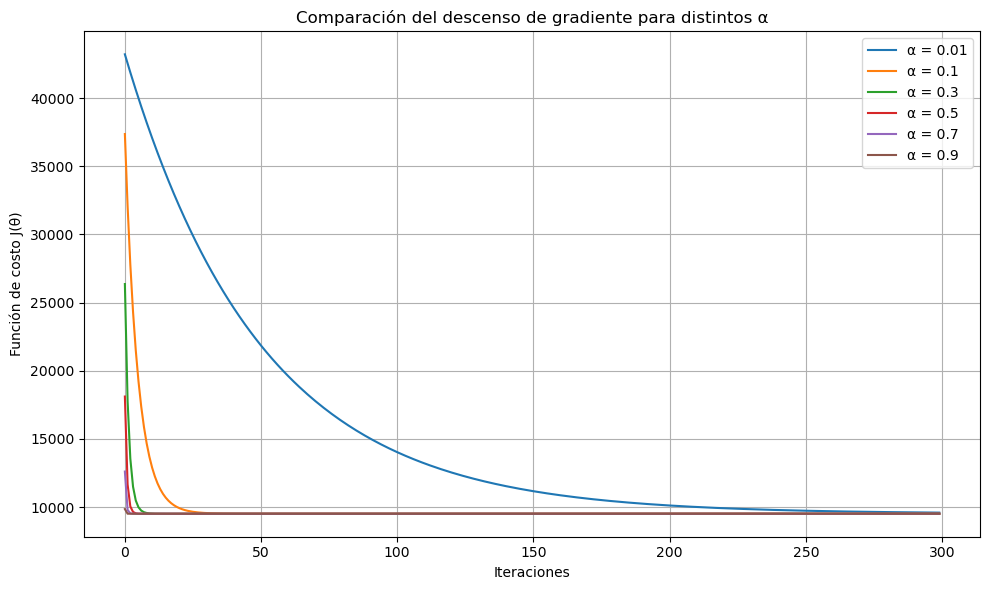

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
# ----------------------------
iterations = 300
alpha_vector = np.array([0.01, 0.1, 0.3, 0.5, 0.7, 0.9])
matrix_J = np.zeros((iterations, len(alpha_vector)))
theta_init = np.zeros((3, 1))


for i in range(len(alpha_vector)):
    theta, J = gradient_descent(X, y, theta_init.copy(), alpha_vector[i], iterations)
    matrix_J[:, i] = J

# Graficar resultados
# ----------------------------
plt.figure(figsize=(10, 6))

for i in range(len(alpha_vector)):
    plt.plot(range(iterations), matrix_J[:, i], label=f'α = {alpha_vector[i]}')

plt.xlabel('Iteraciones')
plt.ylabel('Función de costo J(θ)')
plt.title('Comparación del descenso de gradiente para distintos α')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

